# B&D DS Exercise Part 1
## January 30th, 2018
### Dr Jose M Albornoz

# Import necessary modules

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline

import numpy as np
import seaborn as sns

RANDOM_STATE = 801

# 1 Load data

In [3]:
df_0 = pd.read_excel('kohls.xls')

In [4]:
df_0.head(10)

,SHIPPER,SHIPPER ADDRESS,CONSIGNEE,CONSIGNEE ADDRESS,ZIPCODE,NOTIFY,NOTIFY ADDRESS,BILL OF LADING,ARRIVAL DATE,WEIGHT (LB),...,DISTRIBUTION PORT,HOUSE vs MASTER,MASTER B/L,CARRIER CODE,CARRIER NAME,CARRIER ADDRESS,CARRIER CITY,CARRIER STATE,CARRIER ZIP,PLACE OF RECEIPT
0,CONTINENTAL CONAIR LIMITED,". 35 F.,STANDARD CHARTERED TOWER, MILLENNIUM C...",CONAIR CORPORATION,. 150 MILFORD ROAD EAST WINDSOR NJ 08520 U.S.A .,8520,CONAIR CORPORATION,. 150 MILFORD ROAD EAST WINDSOR NJ 08520 U.S.A .,HJSCHKG3B5123700,2013-10-07,18876.0,...,"Philadelphia, Pennsylvania",,,HJSC,HANJIN SHIPPING COMPANY LTD,80 EAST RT 4 SUITE 490,PARAMUS,NJ,7652,"YANTIAN,GUANGDONG"
1,DHL ISC (HONG KONG) LIMITED,"O/B:PUTIAN ANGOLAOD OUTDOOR GOODS CO., LTD LIY...",STONEWALL TRADING COMPANY LP,"844 MORAGA DRIVE LOS ANGELES,CA 90049 TEL:310-...",0,FED-EX TRADE NETWORK.TRANSPORT &STONEWALL TRAD...,BROKERAGE(TOWER GROUP)19601844 MORAGA DRIVE LO...,EGLV146300505161,2013-10-07,7772.6,...,,,,EGLV,EVERGREEN LINE,NO 163 SEC 1 HSIN-NAN ROAD LUCHU HSIAN,TAOYUAN HSIEN 338,,,"XIAMEN, CHINA"
2,HUGE WAY INTERNATIONAL CO LTD,SEC 2 HIS AN ST PEI TOU DIST,STONEWALL TRADING COMPANY,5900 RODEO RD LOS ANGELES 0,0,STONEWALL TRADING COMPANY,5900 RODEO RD LOS ANGELES,DMALNGB291543,2013-10-07,1894.2,...,,H,NYKS2335539080,DMAL,DANMAR LINES LTD,33 WASHINGTON ST - 14TH FL,NEWARK,NJ,7102,NINGBO
3,ZHEJIANG WUYU APPAREL CO.LTD,YUANJI ROAD NO.6 ECONOMIC DEVELOPMENT ZONE ZHE...,EXCELLED SHEEPSKIN AND LEATHER,COAT CORPORATION 1400 BROADWAY 31ST FLOOR NEW ...,10018,EXCELLED SHEEPSKIN AND LEATHER,COAT CORPORATION 1400 BROADWAY 31ST FLOOR NEW ...,EURFL13907135LAX,2013-10-07,2257.2,...,,H,NYKS2372251610,EURF,EURASIA EXPRESS,11222 LA CIENEGA BLVD - #220,INGLEWOOD,CA,90304,"SHANGHAI, CHINA"
4,DAMCO CHINA LIMITED SHANGHAI BRANCH,O B YANGZHOU TIANMAO SHOES MAKING CO LTD NO 36...,"WOLVERINE WORLD WIDE, INC.",9341 COURTLAND DRIVE ROCKFORD MI 49351 EIN 38-...,0,"WOLVERINE WORLD WIDE, INC.",9341 COURTLAND DRIVE ROCKFORD MI 49351 SHIPPIN...,KKLUSH5621783,2013-10-06,123272.6,...,,,,KKLU,KAWASAKI KISEN KAISHA LTD,,TOKYO,,,SHANGHAI
5,-NOT AVAILABLE-,,-NOT AVAILABLE-,,0,ALAB WHEELS UP INTERNATIONAL INC,11222 LA CIENEGA BOULEVARD SUITE 678 INGLEWOOD...,FTPAN47713B,2013-10-05,17833.2,...,,H,EGLV143382951379,FTPA,FASTIC TRANSPORTATION CO LTD,12F-1 NO 171 SEC 4 NANJING EAST RD,TAIPEI,,,NINGBO
6,-NOT AVAILABLE-,,-NOT AVAILABLE-,,0,,,EXDO610351181,2013-10-04,5361.4,...,,H,HLCUCG2130808634,EXDO,EXPEDITORS INTERNATIONAL OF WASHINGTON INC,1015 THIRD AVE - 12TH FL,SEATTLE,WA,98104-1190,CHITTAGONG
7,-NOT AVAILABLE-,,-NOT AVAILABLE-,,0,,,EXDO610351182,2013-10-04,23883.2,...,,H,HLCUCG2130808634,EXDO,EXPEDITORS INTERNATIONAL OF WASHINGTON INC,1015 THIRD AVE - 12TH FL,SEATTLE,WA,98104-1190,CHITTAGONG
8,-NOT AVAILABLE-,,-NOT AVAILABLE-,,0,,,EXDO610351183,2013-10-04,4800.4,...,,H,HLCUCG2130808634,EXDO,EXPEDITORS INTERNATIONAL OF WASHINGTON INC,1015 THIRD AVE - 12TH FL,SEATTLE,WA,98104-1190,CHITTAGONG
9,-NOT AVAILABLE-,,-NOT AVAILABLE-,,0,,,EXDO610351184,2013-10-04,2963.4,...,,H,HLCUCG2130808634,EXDO,EXPEDITORS INTERNATIONAL OF WASHINGTON INC,1015 THIRD AVE - 12TH FL,SEATTLE,WA,98104-1190,CHITTAGONG


In [5]:
df_0.columns.tolist()

['SHIPPER',
 'SHIPPER ADDRESS',
 'CONSIGNEE',
 'CONSIGNEE ADDRESS',
 'ZIPCODE',
 'NOTIFY',
 'NOTIFY ADDRESS',
 'BILL OF LADING',
 'ARRIVAL DATE',
 'WEIGHT (LB)',
 'WEIGHT (KG)',
 'FOREIGN PORT',
 'US PORT',
 'QUANTITY',
 'Q.UNIT',
 'MEASUREMENT',
 'M.UNIT',
 'SHIP REGISTERED IN',
 'VESSEL NAME',
 'CONTAINER NUMBER',
 'CONTAINER COUNT',
 'PRODUCT DETAILS',
 'MARKS AND NUMBERS',
 'COUNTRY OF ORIGIN',
 'DISTRIBUTION PORT',
 'HOUSE vs MASTER',
 'MASTER B/L',
 'CARRIER CODE',
 'CARRIER NAME',
 'CARRIER ADDRESS',
 'CARRIER CITY',
 'CARRIER STATE',
 'CARRIER ZIP',
 'PLACE OF RECEIPT']

In [6]:
df_0.shape

(2365, 34)

## 1.1 Count of rows with empty strings

In [7]:
df_1 = df_0.replace(to_replace=u' ', value = np.nan)

In [8]:
df_1.isnull().sum()

SHIPPER                  0
SHIPPER ADDRESS       1687
CONSIGNEE                0
CONSIGNEE ADDRESS     1685
ZIPCODE                  0
NOTIFY                1227
NOTIFY ADDRESS        1231
BILL OF LADING           0
ARRIVAL DATE             0
WEIGHT (LB)              0
WEIGHT (KG)              0
FOREIGN PORT             0
US PORT                  0
QUANTITY                 0
Q.UNIT                   0
MEASUREMENT              0
M.UNIT                 344
SHIP REGISTERED IN       0
VESSEL NAME              0
CONTAINER NUMBER         0
CONTAINER COUNT          0
PRODUCT DETAILS          0
MARKS AND NUMBERS        0
COUNTRY OF ORIGIN        0
DISTRIBUTION PORT     2329
HOUSE vs MASTER        911
MASTER B/L            1186
CARRIER CODE             0
CARRIER NAME            28
CARRIER ADDRESS        414
CARRIER CITY           374
CARRIER STATE         1102
CARRIER ZIP           1080
PLACE OF RECEIPT         1
dtype: int64

# 2 Preliminary data exploration

## 2.1 Unique shippers

In [9]:
shippers = df_1['SHIPPER'].unique()

In [10]:
len(shippers)

176

In [11]:
shipper_counts = df_1['SHIPPER'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

In [12]:
shipper_counts

-NOT AVAILABLE-                        1687
EXPEDITORS INTERNATIONAL I PVT LTD      114
EXPEDITORS (BANGLADESH) LTD              84
EXPEDITORS INTERNATIONAL(I)PVT.LTD       44
EXPEDITORS INTERNATIONAL PAKISTAN        39
KL PRIMETEX GUATEMALA S A                18
EXPEDITORS INTERNATIONAL(I) PVT LTD      15
DHL ISC (HONG KONG) LIMITED              13
COSMOPOLITAN INDUSTRIES PVT LTD          13
GOKALDAS IMAGES BANGLADESH               13
NINGBO TEXTILES IMPORT & EXPORT COR       9
CROWN WEARS PVT LTD.                      9
REYABY TAIWAN LIMITED                     9
FENGHUA DOMINOE MANUFACTURING             7
FUZHOU HOME BROAD ARTS & CRAFTS CO.       7
WORLDWIDE LOGISTICS CO.,LTD.XIAMEN        7
NINGBO WUJI ELECTRIC APPLIANCES CO.       6
LUCKY TEXTILE MILLS LIMITED               6
CONTINENTAL CONAIR LIMITED                6
LUANA MARKETING CORP                      6
GAIT TRADING CO.,LIMITED                  6
SHANGHAI EVER GREAT TOY CO ., LTD.        6
NINGBO YORKSUN EXPORT CO.,LTD.  

### 2.1.1 Unique shippers needs cleansing

In [13]:
df_1.loc[df_1['SHIPPER'].isin(['EXPEDITORS INTERNATIONAL I PVT LTD', 'EXPEDITORS INTERNATIONAL(I)PVT.LTD', 
                              'EXPEDITORS INTERNATIONAL(I) PVT LTD', 'EXPEDITORS INTERNATIONAL(1)PVT.LTD',
                              'EXPEDITORS INTERNATIONAL I PVT. LTD']), 'SHIPPER'] = \
'EXPEDITORS INTERNATIONAL I PVT. LTD'

In [14]:
shipper_counts = df_1['SHIPPER'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

In [15]:
shipper_counts

-NOT AVAILABLE-                        1687
EXPEDITORS INTERNATIONAL I PVT. LTD     175
EXPEDITORS (BANGLADESH) LTD              84
EXPEDITORS INTERNATIONAL PAKISTAN        39
KL PRIMETEX GUATEMALA S A                18
DHL ISC (HONG KONG) LIMITED              13
GOKALDAS IMAGES BANGLADESH               13
COSMOPOLITAN INDUSTRIES PVT LTD          13
REYABY TAIWAN LIMITED                     9
NINGBO TEXTILES IMPORT & EXPORT COR       9
CROWN WEARS PVT LTD.                      9
WORLDWIDE LOGISTICS CO.,LTD.XIAMEN        7
FENGHUA DOMINOE MANUFACTURING             7
FUZHOU HOME BROAD ARTS & CRAFTS CO.       7
NINGBO WUJI ELECTRIC APPLIANCES CO.       6
GAIT TRADING CO.,LIMITED                  6
LUCKY TEXTILE MILLS LIMITED               6
CONTINENTAL CONAIR LIMITED                6
SHANGHAI EVER GREAT TOY CO ., LTD.        6
LUANA MARKETING CORP                      6
SINO CONNECTIONS LOGISTICS INC.           5
NINGBO YORKSUN EXPORT CO.,LTD.            5
KUEHNE & NAGEL LTD SHENZHEN BRAN

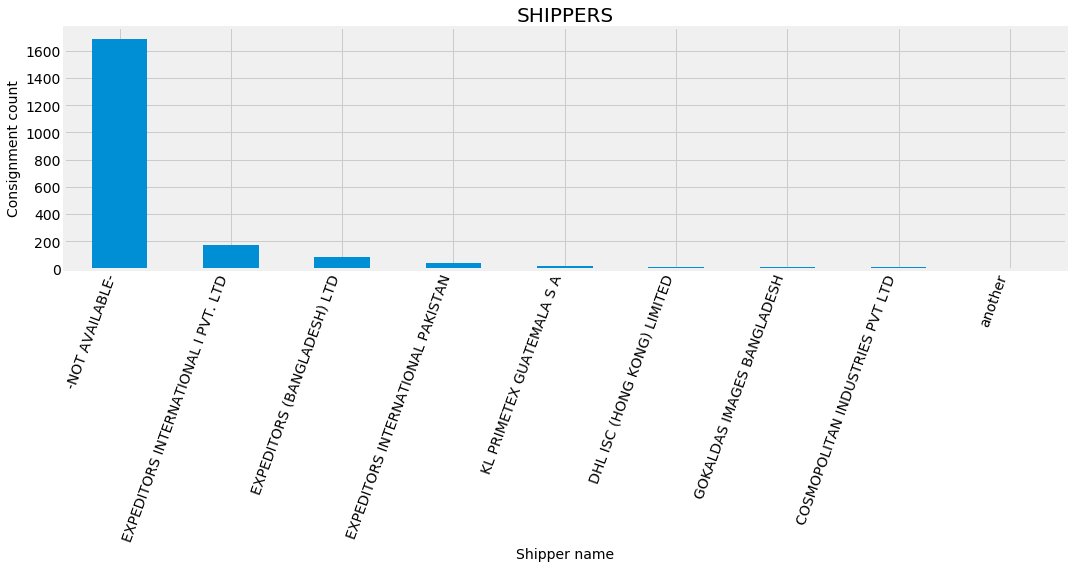

In [17]:
#all values under trash sum to one category
tresh = 10
a = shipper_counts[shipper_counts <= tresh].sum()
shipper_counts = shipper_counts[shipper_counts > tresh]

#then add to filtered df
shipper_counts.loc['another'] = a

#last plot
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1, 1, 1,)
shipper_counts.plot(kind='bar')
plt.title('SHIPPERS', fontsize=20)
plt.xticks(rotation=70)

for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("right")
    
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
    
ax.set_ylabel('Consignment count', fontsize=14)
ax.set_xlabel('Shipper name', fontsize=14)

plt.tight_layout()

fig.savefig('fig1.png', facecolor=fig.get_facecolor(), edgecolor='none')

## 2.2 Unique consignees

In [37]:
consignees = df_1['CONSIGNEE'].unique()

In [38]:
len(consignees)

144

In [39]:
consignee_counts = df_1['CONSIGNEE'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

In [40]:
consignee_counts

-NOT AVAILABLE-                        1685
EXPEDITORS INTL OF WA INC               153
KOHL S DEPARTMENT STORES                114
KOHL S DEPARTMENT STORES INC             50
EXPEDITORS INTERNATIONAL OF              20
STONEWALL TRADING COMPANY LP             17
EXPEDITORS INTL-LAX (EIO)                15
STRATTON HOME                            14
CARDINAL INDUSTRIES INC                  13
KOHL?S                                    9
CONAIR CORPORATION                        9
WORLDWIDE LOGISTICS USA                   8
KOHL S DEPARTMENT STORES, .               8
CARDINAL INDUSTRIES,INC.                  7
LILLY AND ASSOCIATES INTERNATIONAL        7
1888 MILLS SOUTHERN TERRY                 6
KUEHNE + NAGEL,INC.                       5
IMPACT INNOVATIONS, INC                   5
G-III APPAREL GROUP,LTD.                  5
C.H.ROBINSON INTERNATIONAL INC.           5
DANIEL M. FRIEDMAN & ASSOCIATES           5
AEROGROUP INTL INC                        5
S.GOLDBERG & CO., INC.          

### 2.2.1 Consignees needs cleansing

In [41]:
df_1.loc[df_1['CONSIGNEE'].isin(['KOHL S DEPARTMENT STORES', 'KOHL S DEPARTMENT STORES INC', 
                                 'KOHL?S ', 'KOHL S DEPARTMENT STORES, .']), 'CONSIGNEE'] = \
'KOHL S DEPARTMENT STORES'

In [42]:
consignee_counts = df_1['CONSIGNEE'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

In [43]:
consignee_counts

-NOT AVAILABLE-                        1685
KOHL S DEPARTMENT STORES                172
EXPEDITORS INTL OF WA INC               153
EXPEDITORS INTERNATIONAL OF              20
STONEWALL TRADING COMPANY LP             17
EXPEDITORS INTL-LAX (EIO)                15
STRATTON HOME                            14
CARDINAL INDUSTRIES INC                  13
KOHL?S                                    9
CONAIR CORPORATION                        9
WORLDWIDE LOGISTICS USA                   8
CARDINAL INDUSTRIES,INC.                  7
LILLY AND ASSOCIATES INTERNATIONAL        7
1888 MILLS SOUTHERN TERRY                 6
IMPACT INNOVATIONS, INC                   5
KUEHNE + NAGEL,INC.                       5
G-III APPAREL GROUP,LTD.                  5
C.H.ROBINSON INTERNATIONAL INC.           5
DANIEL M. FRIEDMAN & ASSOCIATES           5
AEROGROUP INTL INC                        5
CARDINAL INDUSTRIES, INC.                 4
ADVANCE WATCH COMPANY, LTD                4
THE ASHLEY COLLECTION INC.DBA PR

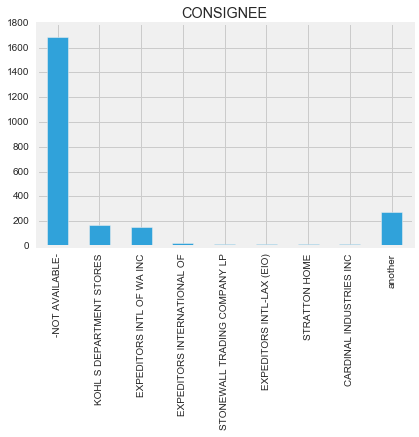

In [44]:
#all values under trash sum to one category
tresh = 10
a = consignee_counts[consignee_counts <= tresh].sum()
consignee_counts = consignee_counts[consignee_counts > tresh]

#then add to filtered df
consignee_counts.loc['another'] = a

#last plot
consignee_counts.plot(kind='bar')
plt.title('CONSIGNEE')

## 2.3 Arrival date

In [45]:
arrival_dates = df_1['ARRIVAL DATE'].unique()

In [46]:
len(arrival_dates)

146

In [47]:
arrival_date_counts = df_1['ARRIVAL DATE'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

In [48]:
arrival_date_counts

2013-04-30    316
2013-05-04    233
2013-04-17    204
2013-05-16    145
2013-04-24     83
2013-10-01     71
2013-09-03     58
2013-07-11     52
2013-07-02     50
2013-08-10     47
2013-07-30     41
2013-08-30     40
2013-09-12     37
2013-06-06     35
2013-08-29     31
2013-08-06     30
2013-10-04     27
2013-09-11     25
2013-07-13     24
2013-07-18     23
2013-09-24     23
2013-08-15     20
2013-07-26     19
2013-04-23     18
2013-08-31     17
2013-08-27     17
2013-08-02     17
2013-07-19     17
2013-08-22     16
2013-05-06     16
             ... 
2013-04-21      2
2013-06-28      2
2013-04-26      2
2013-08-05      2
2013-07-15      2
2013-04-29      2
2013-06-10      2
2013-05-30      2
2013-08-19      1
2013-08-16      1
2013-06-22      1
2013-10-02      1
2013-05-03      1
2013-06-21      1
2013-06-05      1
2013-10-05      1
2013-06-17      1
2013-08-24      1
2013-05-11      1
2013-06-29      1
2013-06-02      1
2013-10-06      1
2013-08-25      1
2013-07-28      1
2013-06-08

In [157]:
dates = arrival_date_counts.index.tolist()

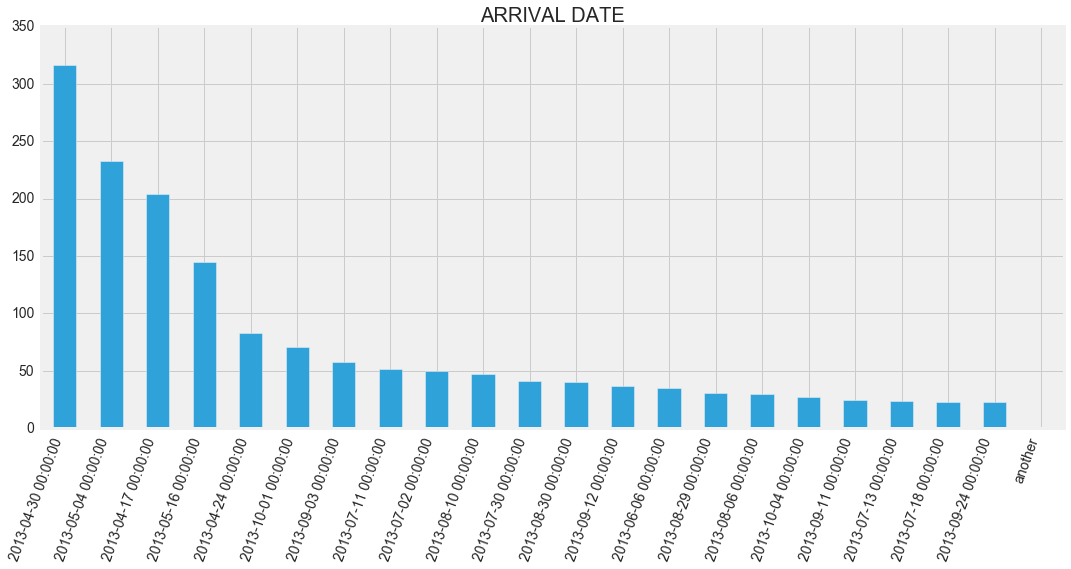

In [151]:
# all values under tresh sum to one category
tresh = 10
a = arrival_date_counts[arrival_date_counts <= tresh].sum()
arrival_date_counts = arrival_date_counts[arrival_date_counts > tresh]

#then add to filtered df
arrival_date_counts.loc['another'] = a

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1, 1, 1,)
arrival_date_counts.plot(kind='bar')
plt.title('ARRIVAL DATE', fontsize=20)
plt.xticks(rotation=70)

for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("right")
    
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 

plt.tight_layout()

#fig.savefig('fig1.png', facecolor=fig.get_facecolor(), edgecolor='none')


## 2.4 Weight (kg)

In [50]:
weight = df_1['WEIGHT (KG)'].unique()

In [51]:
len(weight)

1359

In [52]:
weight_counts = df_1['WEIGHT (KG)'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

In [53]:
weight_counts

53.0       15
193.0      12
165.0      11
668.0      10
216.0       9
284.0       9
266.0       9
1591.0      9
22.0        8
214.0       8
1535.0      8
1901.0      8
258.0       8
541.0       7
144.0       6
336.0       6
281.0       6
2485.0      6
137.0       6
207.0       6
109.0       6
315.0       6
215.0       6
504.0       6
981.0       6
38.0        6
5350.0      6
57.0        5
7344.0      5
3850.0      5
           ..
3582.3      1
2071.0      1
2079.0      1
2083.0      1
10280.0     1
6185.0      1
2093.0      1
10286.0     1
2095.0      1
2102.0      1
2120.0      1
14322.0     1
26600.0     1
14310.0     1
10162.0     1
6046.0      1
1951.0      1
10144.0     1
6057.0      1
6060.0      1
10161.0     1
26556.0     1
18392.0     1
6078.0      1
14273.0     1
17286.0     1
2000.0      1
2003.0      1
2006.0      1
13470.5     1
Name: WEIGHT (KG), dtype: int64

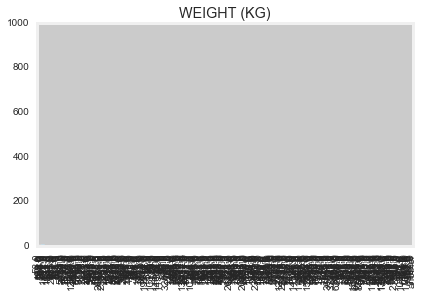

In [54]:
#all values under trash sum to one category
tresh = 1
a = weight_counts[weight_counts <= tresh].sum()
weight_counts = weight_counts[weight_counts > tresh]

#then add to filtered df
weight_counts.loc['another'] = a

#last plot
weight_counts.plot(kind='bar')
plt.title('WEIGHT (KG)')

## 2.5 Foreign port

In [55]:
foreign_port = df_1['FOREIGN PORT'].unique()

In [56]:
len(foreign_port)

31

In [57]:
foreign_port_counts = df_1['FOREIGN PORT'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

In [58]:
foreign_port_counts

Singapore                  1067
Pusan                       384
Colombo                     244
Yantian                     126
Xiamen                      114
Shanghai                     79
Port Muhammad Bin Qasim      65
Ningpo                       54
Kaohsiung                    38
Nhava Sheva                  32
Hong Kong                    26
Santo Tomas                  19
Chiwan                       17
Salalah                      16
Jebel Ali                    16
Mundra                       15
All Other Malta Ports        10
Taipei                       10
Karachi                       8
Ching Tao                     4
Laem Chabang                  4
Thanh Pho Ho Chi Minh         3
Tanjung Pelepas               3
Tokyo                         2
Nansha                        2
Vung Tau                      2
Puerto Cortes                 1
Fuzhou                        1
Vancouver, BC                 1
Bremerhaven                   1
Hu lu Tao                     1
Name: FO

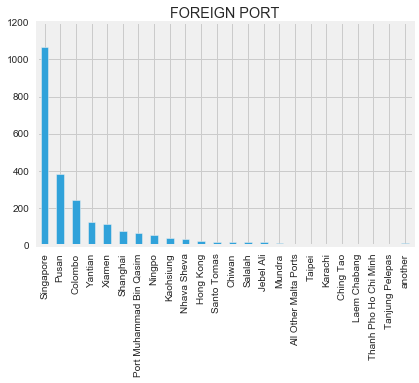

In [59]:
#all values under trash sum to one category
tresh = 2
a = foreign_port_counts[foreign_port_counts <= tresh].sum()
foreign_port_counts = foreign_port_counts[foreign_port_counts > tresh]

#then add to filtered df
foreign_port_counts.loc['another'] = a

#last plot
foreign_port_counts.plot(kind='bar')
plt.title('FOREIGN PORT')

## 2.6 US port

In [60]:
us_port = df_1['US PORT'].unique()

In [61]:
len(us_port)

16

In [62]:
us_port_counts = df_1['US PORT'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

In [63]:
us_port_counts

Los Angeles, California                     1626
New York/Newark Area, Newark, New Jersey     397
Long Beach, California                       187
Savannah, Georgia                             63
New York, New York                            33
Miami, Florida                                19
Tacoma, Washington                            11
Seattle, Washington                            8
Charleston, South Carolina                     7
Oakland, California                            4
Norfolk, Virginia                              3
Boston, Massachusetts                          3
Wilmington, North Carolina                     1
Brunswick, Georgia                             1
Port Everglades, Florida                       1
Baltimore, Maryland                            1
Name: US PORT, dtype: int64

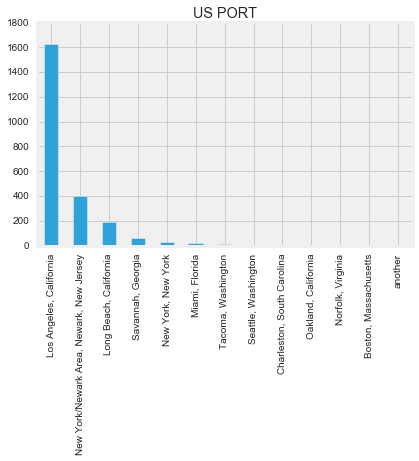

In [64]:
#all values under trash sum to one category
tresh = 2
a = us_port_counts[us_port_counts <= tresh].sum()
us_port_counts = us_port_counts[us_port_counts > tresh]

#then add to filtered df
us_port_counts.loc['another'] = a

#last plot
us_port_counts.plot(kind='bar')
plt.title('US PORT')

## 2.7 Quantity

In [23]:
quantity = df_1['QUANTITY'].unique()

In [24]:
len(quantity)

926

In [25]:
quantity_counts = df_1['QUANTITY'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

In [26]:
quantity_counts

24       23
28       21
32       18
48       17
15       16
56       16
80       15
100      15
64       15
10       15
120      14
63       14
40       13
230      13
66       13
16       13
70       12
167      12
12       12
5        12
9        12
125      12
34       12
18       12
42       11
14       11
47       11
144      10
60       10
68       10
         ..
7229      1
1086      1
3135      1
1090      1
15437     1
1108      1
489       1
7265      1
3177      1
1130      1
4710      1
3191      1
1144      1
1150      1
2508      1
15489     1
1158      1
1174      1
1180      1
3231      1
3233      1
1186      1
1192      1
3241      1
1194      1
23725     1
461       1
9394      1
1206      1
11975     1
Name: QUANTITY, Length: 926, dtype: int64

Text(0.5,1,'QUANTITY')

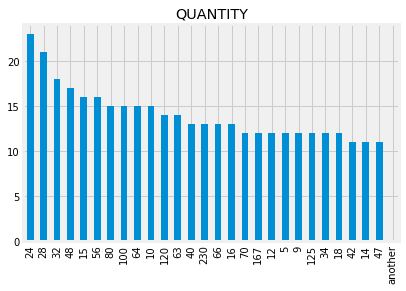

In [28]:
#all values under trash sum to one category
tresh = 5
a = quantity_counts[quantity_counts <= tresh].sum()
quantity_counts = quantity_counts[quantity_counts > tresh]

#then add to filtered df
quantity_counts.loc['another'] = a

#last plot
quantity_counts.plot(kind='bar')
plt.title('QUANTITY')

## 2.8 Quantity unit

In [70]:
quantity_unit = df_1['Q.UNIT'].unique()

In [71]:
len(quantity_unit)

5

In [72]:
quantity_unit

array([u'CTN', u'PCS', u'PKG', u'CNT', u'CRT'], dtype=object)

In [73]:
quantity_unit_counts = df_1['Q.UNIT'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

In [74]:
quantity_unit_counts

CTN    2125
PCS     213
CNT      18
PKG       8
CRT       1
Name: Q.UNIT, dtype: int64

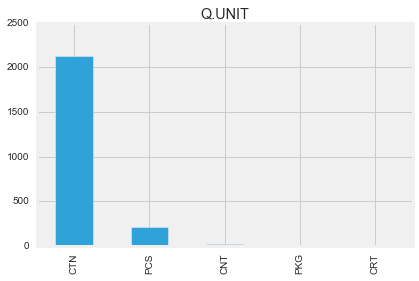

In [75]:
quantity_unit_counts.plot(kind='bar')
plt.title('Q.UNIT')

## 2.9 Measurement

In [76]:
measurement = df_1['MEASUREMENT'].unique()

In [77]:
len(measurement)

179

In [78]:
measurement_counts = df_1['MEASUREMENT'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

In [79]:
measurement_counts

0       622
1       221
2       183
3        88
4        82
7        69
8        64
5        61
6        58
10       51
9        47
11       41
16       39
13       38
15       32
12       30
23       26
21       26
14       24
20       20
22       20
17       20
18       18
24       15
30       13
53       13
19       13
58       11
60       11
27       11
       ... 
214       1
85        1
226       1
234       1
244       1
248       1
254       1
262       1
264       1
276       1
2331      1
290       1
302       1
6449      1
364       1
368       1
394       1
448       1
522       1
708       1
5034      1
5258      1
3709      1
3789      1
1419      1
43        1
71        1
77        1
81        1
5916      1
Name: MEASUREMENT, dtype: int64

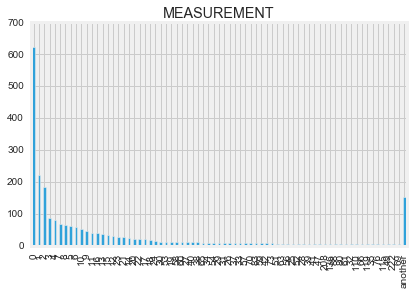

In [80]:
#all values under trash sum to one category
tresh = 3
a = measurement_counts[measurement_counts <= tresh].sum()
measurement_counts = measurement_counts[measurement_counts > tresh]

#then add to filtered df
measurement_counts.loc['another'] = a

#last plot
measurement_counts.plot(kind='bar')
plt.title('MEASUREMENT')

## 2.10 Ship registration

In [81]:
ship_registration = df_1['SHIP REGISTERED IN'].unique()

In [82]:
len(ship_registration)

21

In [83]:
ship_registration_counts = df_1['SHIP REGISTERED IN'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

In [84]:
ship_registration_counts

PANAMA                       1091
HONG KONG                     458
SINGAPORE                     182
LIBERIA                       169
UNITED STATES                 144
GERMANY                       111
UNITED KINGDOM                 54
ANTIGUA AND BARBUDA            45
DENMARK                        30
BAHAMAS                        17
ISRAEL                         13
BERMUDA                        10
MARSHALL ISLANDS                8
CHINA                           8
GREECE                          8
CYPRUS                          5
KOREA, REPUBLIC OF              5
MALTA                           3
FRANCE                          2
TAIWAN, PROVINCE OF CHINA       1
MALAYSIA                        1
Name: SHIP REGISTERED IN, dtype: int64

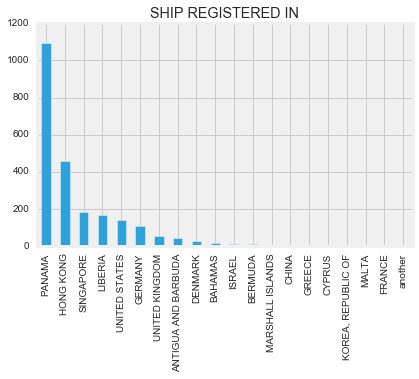

In [85]:
#all values under trash sum to one category
tresh = 1
a = ship_registration_counts[ship_registration_counts <= tresh].sum()
ship_registration_counts = ship_registration_counts[ship_registration_counts > tresh]

#then add to filtered df
ship_registration_counts.loc['another'] = a

#last plot
ship_registration_counts.plot(kind='bar')
plt.title('SHIP REGISTERED IN')

## 2.11 Vessel name

In [86]:
vessel_name = df_1['VESSEL NAME'].unique()

In [87]:
len(vessel_name)

247

In [88]:
vessel_name_counts = df_1['VESSEL NAME'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

In [89]:
vessel_name_counts

APL WASHINGTON        335
HYUNDAI COURAGE       237
APL ZEEBRUGGE         214
HYUNDAI FAITH         144
APL LATVIA            116
OOCL VANCOUVER         63
APL SAVANNAH           51
HANJIN XIAMEN          46
APL PHOENIX            40
APL TEXAS              40
NYK ARTEMIS            35
NYK APOLLO             35
APL FRANCE             31
OOCL OAKLAND           26
BERLIN EXPRESS         24
APL BOSTON             23
CMA CGM CORAL          20
APL AGATE              20
DALIAN EXPRESS         20
NYK THEMIS             18
DENEB J                18
HANJIN CHONGQING       18
YANTIAN EXPRESS        17
HANJIN PORT KELANG     17
EVER STRONG            17
NYK LIBRA              15
APL PEARL              15
CMA CGM EIFFEL         15
MARE ATLANTICUM        14
APL CYPRINE            14
                     ... 
HANJIN COPENHAGEN       1
EVER ELITE              1
UASC JEDDAH             1
EVER EXCEL              1
HANJIN GREECE           1
APL IOLITE              1
EVER SIGMA              1
HANJIN ROME 

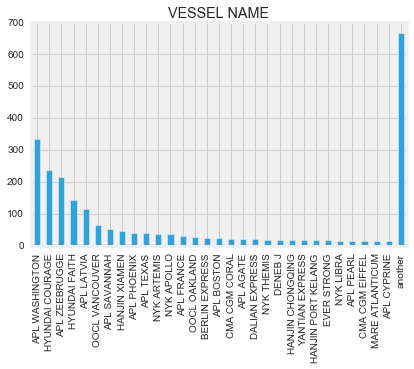

In [90]:
#all values under trash sum to one category
tresh = 13
a = vessel_name_counts[vessel_name_counts <= tresh].sum()
vessel_name_counts = vessel_name_counts[vessel_name_counts > tresh]

#then add to filtered df
vessel_name_counts.loc['another'] = a

#last plot
vessel_name_counts.plot(kind='bar')
plt.title('VESSEL NAME')

## 2.12 Container number

In [91]:
container_number = df_1['CONTAINER NUMBER'].unique()

In [92]:
len(container_number)

840

In [93]:
container_number_counts = df_1['CONTAINER NUMBER'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

In [94]:
container_number_counts

BMOU5212540                                                                60
HDMU6392791                                                                56
HDMU6332811                                                                50
HDMU6686820                                                                42
TCKU9089561                                                                40
HDMU6410730                                                                36
HDMU4438912                                                                36
DFSU6245920                                                                33
BSIU9344663                                                                30
HDMU6365646                                                                30
HDMU6691792                                                                30
HDMU4671210                                                                30
HDMU6534140                                                     

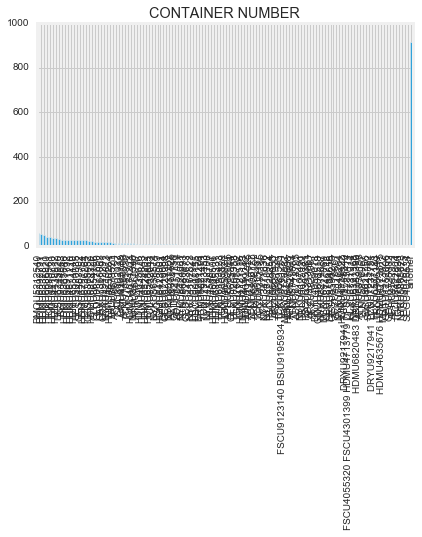

In [95]:
#all values under trash sum to one category
tresh = 3
a = container_number_counts[container_number_counts <= tresh].sum()
container_number_counts = container_number_counts[container_number_counts > tresh]

#then add to filtered df
container_number_counts.loc['another'] = a

#last plot
container_number_counts.plot(kind='bar')
plt.title('CONTAINER NUMBER')

## 2.13 Container count

In [96]:
container_count = df_1['CONTAINER COUNT'].unique()

In [97]:
len(container_count)

18

In [98]:
container_count_counts = df_1['CONTAINER COUNT'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

In [99]:
container_count_counts

1     2043
2      166
3       71
4       26
5       21
6       10
7        6
10       5
13       3
11       3
8        3
17       2
9        1
27       1
18       1
14       1
12       1
29       1
Name: CONTAINER COUNT, dtype: int64

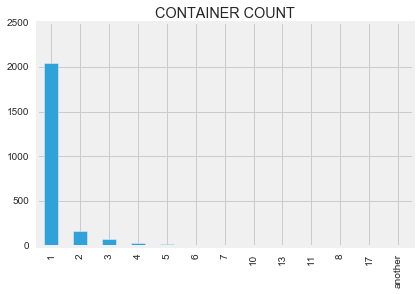

In [100]:
#all values under trash sum to one category
tresh = 1
a = container_count_counts[container_count_counts <= tresh].sum()
container_count_counts = container_count_counts[container_count_counts > tresh]

#then add to filtered df
container_count_counts.loc['another'] = a

#last plot
container_count_counts.plot(kind='bar')
plt.title('CONTAINER COUNT')

## 2.14 Product details

In [101]:
product_details = df_1['PRODUCT DETAILS'].unique()

In [102]:
len(product_details)

1445

In [103]:
product_details_counts = df_1['PRODUCT DETAILS'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

In [104]:
product_details_counts

BOYS COTTON WOVEN SHORT                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

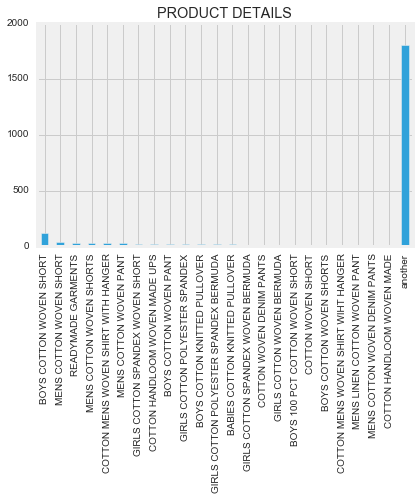

In [105]:
#all values under trash sum to one category
tresh = 10
a = product_details_counts[product_details_counts <= tresh].sum()
product_details_counts = product_details_counts[product_details_counts > tresh]

#then add to filtered df
product_details_counts.loc['another'] = a

#last plot
product_details_counts.plot(kind='bar')
plt.title('PRODUCT DETAILS')

## 2.15 Country of origin

In [106]:
country_origin = df_1['COUNTRY OF ORIGIN'].unique()

In [107]:
len(country_origin)

19

In [108]:
country_origin_counts = df_1['COUNTRY OF ORIGIN'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

In [109]:
country_origin_counts

Singapore         1067
China              398
South Korea        384
Sri Lanka          244
Pakistan            73
China Taiwan        48
India               47
Hong Kong           26
Guatemala           19
United Arab Em      16
Oman                16
Malta               10
Vietnam              5
Thailand             4
Malaysia             3
Japan                2
Germany              1
Honduras             1
Canada               1
Name: COUNTRY OF ORIGIN, dtype: int64

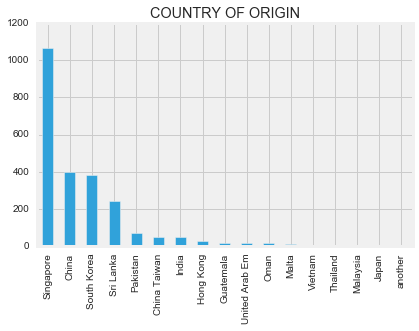

In [110]:
#all values under trash sum to one category
tresh = 1
a = country_origin_counts[country_origin_counts <= tresh].sum()
country_origin_counts = country_origin_counts[country_origin_counts > tresh]

#then add to filtered df
country_origin_counts.loc['another'] = a

#last plot
country_origin_counts.plot(kind='bar')
plt.title('COUNTRY OF ORIGIN')

## 2.16 Carrier code

In [111]:
carrier_code = df_1['CARRIER CODE'].unique()

In [112]:
len(carrier_code)

75

In [113]:
carrier_code_counts = df_1['CARRIER CODE'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

In [114]:
carrier_code_counts

EXDO    1000
NYKS     353
APLU     322
HLCU     189
MAEU     112
EGLV      45
KKLU      29
OOLU      22
HDMU      20
SMLU      18
CMDU      14
SMMB      12
HJSC      12
TYPC      12
BANQ       9
VZLG       9
HJLT       9
COSU       9
HYSL       9
ENCL       8
CHNJ       8
MSCU       8
TECB       7
CHHK       7
SINO       7
KLQI       7
WWLL       7
WHLC       6
TWGD       6
DEWC       5
        ... 
PIFW       2
FTNV       2
MWNC       2
RWRD       2
WECD       1
ODFN       1
PABV       1
EVOK       1
CLAM       1
HIHN       1
TRUM       1
UNQL       1
EVLL       1
PLHI       1
SCLI       1
TKIB       1
FTPA       1
DMAL       1
SCQH       1
ZIMU       1
ECUI       1
REGB       1
WWOL       1
AUSR       1
TOEJ       1
HSPG       1
NAQA       1
ECCI       1
MOLU       1
AROF       1
Name: CARRIER CODE, dtype: int64

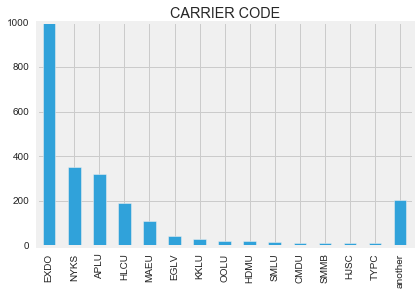

In [115]:
#all values under trash sum to one category
tresh = 10
a = carrier_code_counts[carrier_code_counts <= tresh].sum()
carrier_code_counts = carrier_code_counts[carrier_code_counts > tresh]

#then add to filtered df
carrier_code_counts.loc['another'] = a

#last plot
carrier_code_counts.plot(kind='bar')
plt.title('CARRIER CODE')

## 2.17 Carrier name

In [116]:
carrier_name = df_1['CARRIER NAME'].unique()

In [117]:
len(carrier_name)

67

In [118]:
carrier_name_counts = df_1['CARRIER NAME'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

In [119]:
carrier_name_counts

EXPEDITORS INTERNATIONAL OF WASHINGTON INC           1000
NYK LINE (NIPPON YUSEN KAISHA)                        353
APL CO PTE LTD-NOL GROUP                              322
HAPAG LLOYD A G                                       189
MAERSK LINE                                           112
EVERGREEN LINE                                         45
KAWASAKI KISEN KAISHA LTD                              29
ORIENT OVERSEAS CONTAINER LINE LTD                     22
HYUNDAI MERCHANT MARINE                                20
SEABOARD MARINE LTD                                    18
COMPAGNIE MARITIME D-AFFRETEMENT                       14
HANJIN SHIPPING COMPANY LTD                            12
SEAMASTER LOGISTICS INC                                12
VIZION LOGISTICS LLC                                    9
CHINA OCEAN SHIPPING COMPANY                            9
HECNY SHIPPING LIMITED                                  9
HANJIN LOGISTICS INC                                    9
BLUE ANCHOR LI

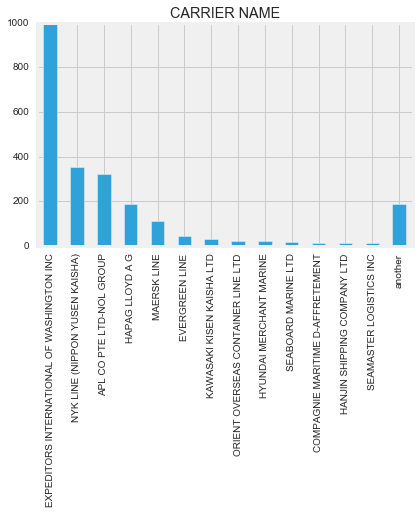

In [120]:
#all values under trash sum to one category
tresh = 10
a = carrier_name_counts[carrier_name_counts <= tresh].sum()
carrier_name_counts = carrier_name_counts[carrier_name_counts > tresh]

#then add to filtered df
carrier_name_counts.loc['another'] = a

#last plot
carrier_name_counts.plot(kind='bar')
plt.title('CARRIER NAME')

## 2.18 Place of receipt

In [121]:
place_receipt = df_1['PLACE OF RECEIPT'].unique()

In [122]:
len(place_receipt)

88

In [123]:
place_receipt

array([u'YANTIAN,GUANGDONG', u'XIAMEN, CHINA', u'NINGBO',
       u'SHANGHAI, CHINA', u'SHANGHAI', u'CHITTAGONG', u'CHITTAGONG, BD',
       u'CHENNAI', u'NING BO', u'LAT KRABANG', u'NINGBO,ZHEJIANG',
       u'QINGDAO', u'YANTIAN, CHINA', u'MUHAMMAD BIN QASI', u'MUNDRA, IN',
       u'NHAVA SHEVA, IN', u'JAKARTA, ID', u'CHENNAI, IN', u'PORT KLANG',
       u'KEELUNG', u'TAOYUAN, TA', u'XIAMEN', u'TUTICORIN', u'YANTIAN',
       u'HONG KONG', u'KARACHI PAKISTAN', u'YANTIAN DISTRIC', u'CN',
       u'YANTIAN, CN', u'FUZHOU CN', u'FUZHOU, CHINA', u'KAOHSIUNG',
       u'YANTIAN GD', u'KARACHI', u'NANSHA', u'YANTIAN, PC', u'XIAMEN CN',
       u'JIANGYIN, FUQING', u'JIEYANG', u'SEMARANG', u'XIAMEN, CN',
       u'QINGDAO,CHINA', u'HO CHI MINH CITY', u'PORT QASIM',
       u'JAWAHARLAL NEHRU', u'DA CHAN BAY, CN', u'HONG KONG, HK',
       u'PORT QASIM, PAKIS', u'BAHRAIN', u'YANGSHAN, PC',
       u'CHENNAI, INDIA', u'ZHANGJIAGANG, JIA', u'TAICHUNG',
       u'DALIAN, CHINA', u'DALIAN', u'CHITTAGONG, BA'

In [124]:
place_receipt_counts = df_1['PLACE OF RECEIPT'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

In [125]:
place_receipt_counts

CHENNAI (FORMERLY    950
CHENNAI, IN          266
CHENNAI              208
CHITTAGONG           133
YANTIAN               88
CHITTAGONG, BD        84
XIAMEN                83
SHANGHAI              56
CHITTAGONG, BA        43
MUHAMMAD BIN QASI     39
NHAVA SHEVA, IN       33
NINGBO                32
PORT QASIM            31
BAHRAIN               18
MUNDRA, IN            17
KAOHSIUNG             17
CHENNAI, INDIA        16
SALALAH               15
XIAMEN, CHINA         14
GUATEMALA CITY        14
YANTIAN, CHINA        13
HONG KONG             13
KARACHI                9
HONG KONG, HK          8
NINGBO, CHINA          8
NINGBO,ZHEJIANG        8
XIAMEN, FUJIAN         8
SHANGHAI, CHINA        7
YANTIAN, CN            7
XIAMEN,CHINA           7
                    ... 
KEAMARI, KARACHI       2
YANTIAN, PC            2
YANTIAN GD             2
GUATEMALA              1
QINGDAO                1
JIANGYIN, FUQING       1
NINGBO, PC             1
DALIAN                 1
YANTIAN, SHENZHEN      1


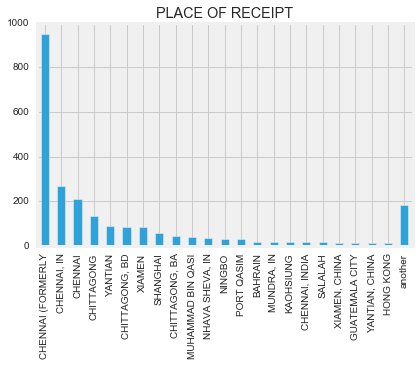

In [126]:
#all values under trash sum to one category
tresh = 10
a = place_receipt_counts[place_receipt_counts <= tresh].sum()
place_receipt_counts = place_receipt_counts[place_receipt_counts > tresh]

#then add to filtered df
place_receipt_counts.loc['another'] = a

#last plot
place_receipt_counts.plot(kind='bar')
plt.title('PLACE OF RECEIPT')

# 3 Time series plots

## 3.1 Sort by arrival date

In [127]:
df_1['ARRIVAL DATE DT'] = pd.to_datetime(df_1['ARRIVAL DATE'])
df_2 = df_1.sort_values(by='ARRIVAL DATE DT')

## 3.2 Weight

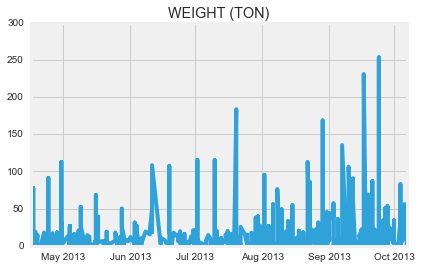

In [128]:
plt.plot(df_2['ARRIVAL DATE DT'], df_2['WEIGHT (KG)']/1000)
plt.title('WEIGHT (TON)')

## 3.3 Quantity

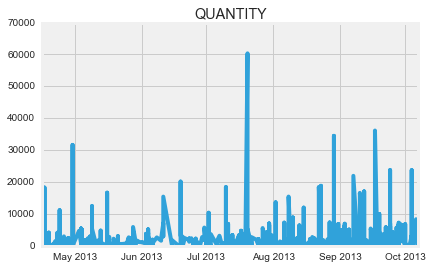

In [129]:
plt.plot(df_2['ARRIVAL DATE DT'], df_2['QUANTITY'])
plt.title('QUANTITY')

## 3.4 Measurement

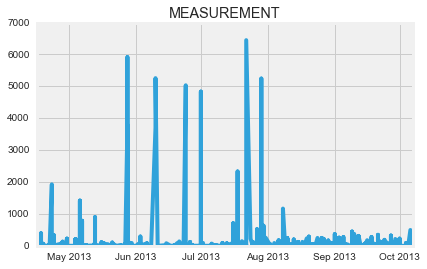

In [130]:
plt.plot(df_2['ARRIVAL DATE DT'], df_2['MEASUREMENT'])
plt.title('MEASUREMENT')

## 3.5 Container count

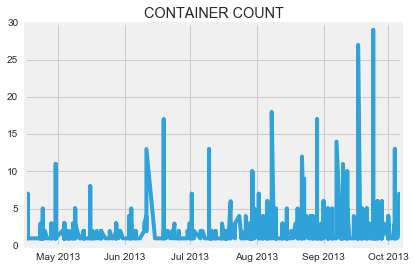

In [131]:
plt.plot(df_2['ARRIVAL DATE DT'], df_2['CONTAINER COUNT'])
plt.title('CONTAINER COUNT')

## 3.5 Correlation between weight and container count

In [132]:
df_2['WEIGHT (KG)'].corr(df_2['CONTAINER COUNT'])


0.8981227061347542

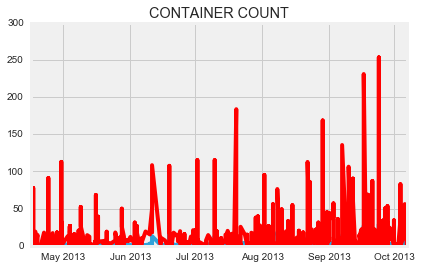

In [133]:
plt.plot(df_2['ARRIVAL DATE DT'], df_2['CONTAINER COUNT'], label = 'Container count')
plt.plot(df_2['ARRIVAL DATE DT'], df_2['WEIGHT (KG)']/1000, color = 'red', label = 'Weight (Ton)')
plt.title('CONTAINER COUNT')

# 4 Things we can work with

In [134]:
arrival_dates = df_1['ARRIVAL DATE'].unique()

In [135]:
weight = df_1['WEIGHT (KG)'].unique()

In [136]:
foreign_port = df_1['FOREIGN PORT'].unique()

In [137]:
us_port = df_1['US PORT'].unique()

In [138]:
quantity = df_1['QUANTITY'].unique()

In [139]:
quantity_unit = df_1['Q.UNIT'].unique()

In [140]:
measurement = df_1['MEASUREMENT'].unique()

In [141]:
ship_registration = df_1['SHIP REGISTERED IN'].unique()

In [142]:
vessel_name = df_1['VESSEL NAME'].unique()

In [143]:
container_number = df_1['CONTAINER NUMBER'].unique()

In [144]:
container_count = df_1['CONTAINER COUNT'].unique()

In [145]:
product_details = df_1['PRODUCT DETAILS'].unique()

In [146]:
country_origin = df_1['COUNTRY OF ORIGIN'].unique()

In [147]:
carrier_code = df_1['CARRIER CODE'].unique()

In [148]:
carrier_name = df_1['CARRIER NAME'].unique()

In [149]:
place_receipt = df_1['PLACE OF RECEIPT'].unique()